In [47]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
arxiv_data = []
line_count = 0

file_path = r'C:\Users\danie\Documents\Uni\Semester 13\Datascience 2\Projekte\Projekt1\arxiv-metadata-oai-snapshot.json'

for line in open(file_path, 'r'):
    arxiv_data.append(json.loads(line))
    line_count += 1

    if line_count == 100:
        break

In [49]:
df = pd.DataFrame(arxiv_data)

In [50]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


Explaining the columns:
id: ArXiv ID (can be used to access the paper, see below) (dropped, not needed)
submitter: Who submitted the paper
authors: Authors of the paper
title: Title of the paper
comments: Additional info, such as number of pages and figures
journal-ref: Information about the journal the paper was published in
doi: [https://www.doi.org](Digital Object Identifier)    (dropped, not needed)
abstract: The abstract of the paper
categories: Categories / tags in the ArXiv system
versions: A version history

Source: Kaggle

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    object
 1   submitter       100 non-null    object
 2   authors         100 non-null    object
 3   title           100 non-null    object
 4   comments        87 non-null     object
 5   journal-ref     52 non-null     object
 6   doi             50 non-null     object
 7   report-no       8 non-null      object
 8   categories      100 non-null    object
 9   license         13 non-null     object
 10  abstract        100 non-null    object
 11  versions        100 non-null    object
 12  update_date     100 non-null    object
 13  authors_parsed  100 non-null    object
dtypes: object(14)
memory usage: 11.1+ KB


In [52]:
df.describe()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
count,100,100,100,100,87,52,50,8,100,13,100,100,100,100
unique,100,93,96,100,83,52,50,8,66,2,100,100,47,96
top,0704.0001,Maxim A. Yurkin,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",Calculation of prompt diphoton production cros...,38 pages,"Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-th,http://arxiv.org/licenses/nonexclusive-distrib...,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2007-05-23,"[[Yurkin, Maxim A., ], [Maltsev, Valeri P., ],..."
freq,1,4,3,1,3,1,1,1,7,11,1,1,23,3


In [53]:
df.isnull().sum()

id                 0
submitter          0
authors            0
title              0
comments          13
journal-ref       48
doi               50
report-no         92
categories         0
license           87
abstract           0
versions           0
update_date        0
authors_parsed     0
dtype: int64

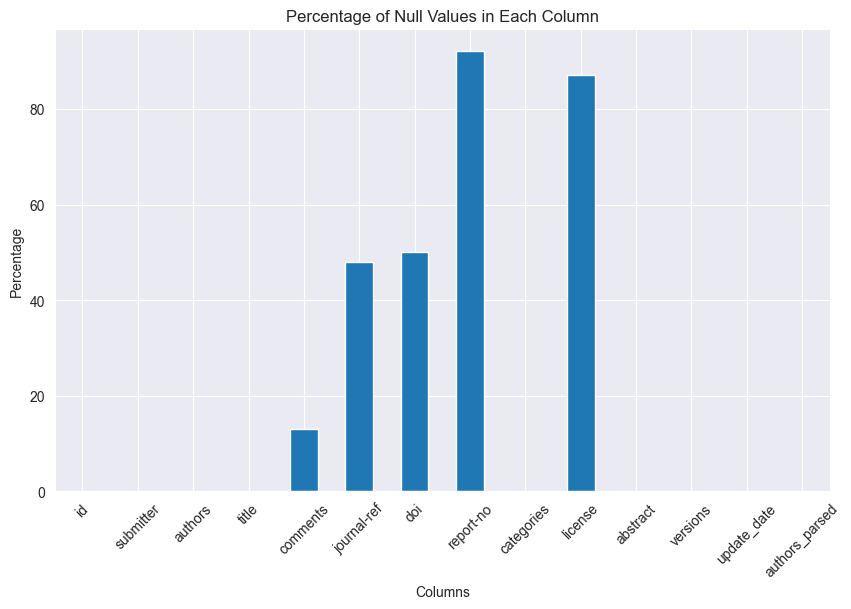

In [54]:
null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar')
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

ID column has no missing values, but we will drop it anyway.
Because the column `journal-ref` has 50% missing values, we will drop it.
Because the column `doi` has 10% missing values, we will drop it.
Because the column `report-no` has 90% missing values, we will drop it.
Because the column `license` has 90% missing values, we will drop it.

In [55]:
df.drop(['id', 'journal-ref', 'doi', 'report-no', 'license'], axis=1, inplace=True)

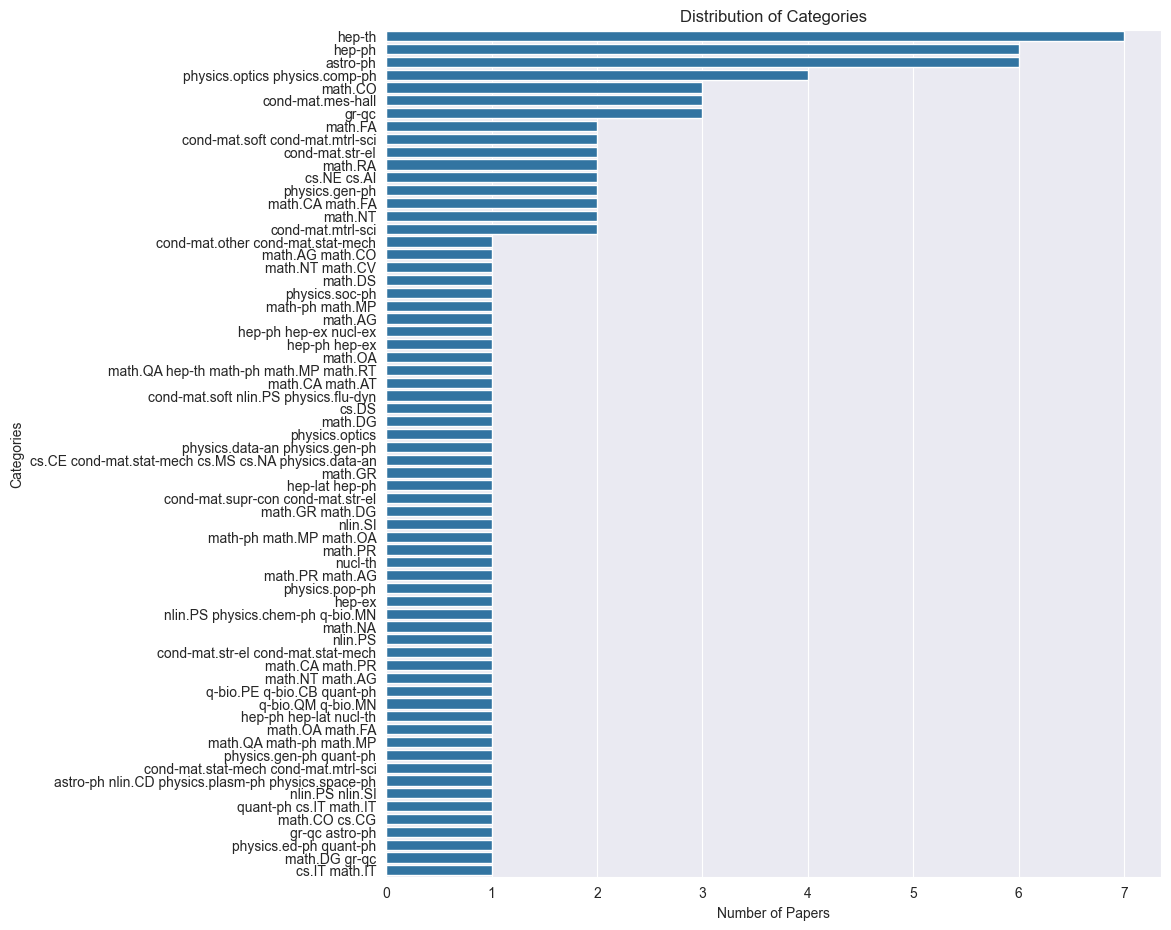

In [56]:
# Distribution of Categories
plt.figure(figsize=(10, 11))
sns.countplot(y='categories', data=df, order=df['categories'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Categories')
plt.show()

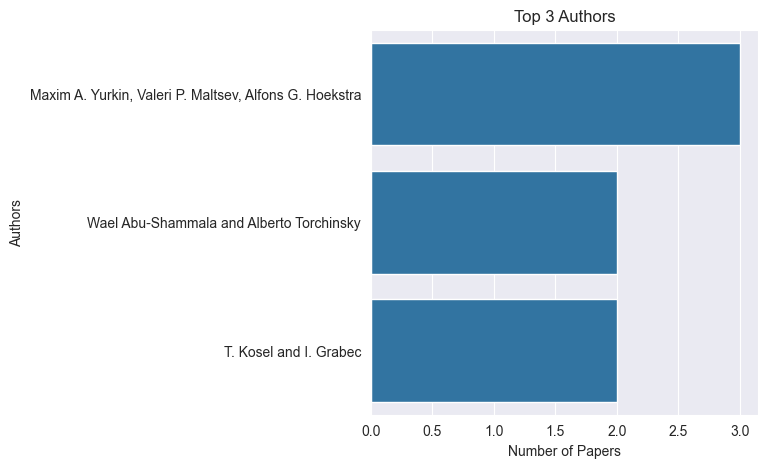

In [57]:
# plotting top 3 authors
plt.figure(figsize=(5, 5))
sns.countplot(y='authors', data=df, order=df['authors'].value_counts().iloc[:3].index)
plt.title('Top 3 Authors')
plt.xlabel('Number of Papers')
plt.ylabel('Authors')
plt.show()
